C:\Users\ellio\AppData\Local\Temp\ipykernel_6992\1801660842.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: 1 if x == 'Y' else 0)


Silhouette Score : 0.13

Cluster Centers:
   E_coli  K_pneumoniae  P_mirabilis  E_faecalis  S_saprophyticus  \
0    0.85          0.30         0.95        0.65             0.20   
1    0.00          0.17         0.25        0.21             0.42   
2    0.00          0.80         0.60        0.27             0.53   
3    1.00          0.57         0.10        0.19             0.86   
4    0.70          0.50         0.65        0.95             0.50   

   P_aeruginosa  C_albicans  
0          0.75        0.80  
1          0.21        0.38  
2          0.80        0.33  
3          0.67        0.33  
4         -0.00        0.30  


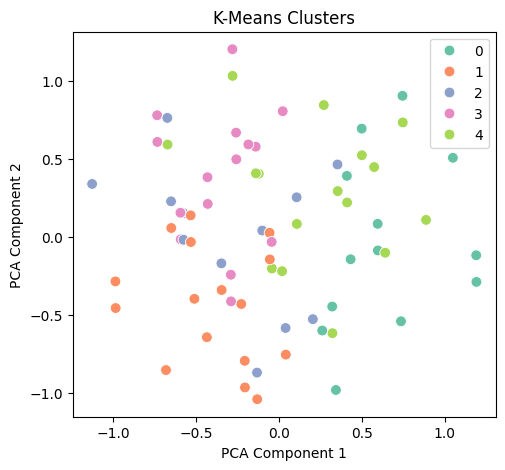

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
# Load dataset
df = pd.read_csv("fake_patient_data.csv")  # Replace with your actual file path
# Drop metadata columns to focus on pathogens
non_pathogen_cols = ['Age_Range', 'Diabetic', 'Catheter']
X = df.drop(columns=non_pathogen_cols)
# Convert 'Y'/'N' to 1/0
X = X.applymap(lambda x: 1 if x == 'Y' else 0)
# Split into training and test set (80/20)
# Fit KMeans on training data
k = 5  # You can experiment with different values
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
# Predict cluster labels for both sets
train_labels = kmeans.predict(X)
# Silhouette scores
silhouette = silhouette_score(X, train_labels)
print(f"Silhouette Score : {silhouette:.2f}")
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
# Plotting training clusters
plt.figure(figsize=(12, 5))
# Train set plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], hue=train_labels, palette='Set2', s=60)
plt.title("K-Means Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
# Optional: show the cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("\nCluster Centers:")
print(centers.round(2))